# Filip Kucia

In [57]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Task 6.0

# Ex 1

In [58]:
# implement Barabasi Albert network
def barabasi_albert_graph(m_0, m, n):
    edges = {}
    degree_dict = {}
    degrees = np.array([m_0-1 for _ in range(m_0)] + [0 for _ in range(n)])
    degree_dict[0] = degrees.copy()
    edges[0] = []

    for i in range(m_0):
        for j in range(i+1, m_0):
            edges[0].append((i, j))
   
    for i in range(n):
        edges[i+1] = []
        probs = degrees[:m_0+i]/((2*m*i) + m_0*(m_0-1))
        nodes = np.random.choice(list(range(m_0 + i)), size=m, replace=False, p=probs)
        for node in nodes:
            edges[i+1].append((m_0+i, node))
            degrees[node] += 1
            degrees[m_0 + i] += 1
        degree_dict[i+1] = degrees.copy()
    return edges, degree_dict
  


In [59]:
edges = barabasi_albert_graph(5, 3, 10)

# Ex 2

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm

def draw_animation(m_0, m, n):
    edges, degrees = barabasi_albert_graph(m_0, m, n)
    node_positions = np.random.rand(m_0 + n, 2)
    fig, ax = plt.subplots(figsize=(20, 20))
    
    color_map = cm.viridis
    all_edges = []

    def animate(i):
        ax.clear()
        
        # Accumulate edges to display up to the current frame
        all_edges.extend(edges[i])
        
        # Scatter plot for nodes
        node_colors = color_map(degrees[i][:m_0 + i] / (np.max(degrees[i][:m_0 + i]) + 1))
        ax.scatter(
            node_positions[:m_0 + i, 0],
            node_positions[:m_0 + i, 1],
            s=degrees[i][:m_0 + i] * 100,
            c=node_colors,
            edgecolors='k',
            alpha=0.8
        )
        
        # Annotate nodes with their index (indicating when they were added)
        for j in range(m_0 + i):
            ax.text(
                node_positions[j, 0],
                node_positions[j, 1],
                str(j),
                fontsize=10,
                ha='center',
                va='center',
                color='white'  # Adjust color if necessary for better contrast
            )
        
        # Draw edges up to the current frame
        for edge in all_edges:
            ax.plot(
                [node_positions[edge[0]][0], node_positions[edge[1]][0]],
                [node_positions[edge[0]][1], node_positions[edge[1]][1]],
                c='black',
                linewidth=0.5,
                alpha=0.6
            )
        
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_title(f"Barabasi Albert Graph (Frame {i+1}/{n+1})", fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel("x", fontsize=16)
        ax.set_ylabel("y", fontsize=16)
        
        return ax
    
    # Adjust interval and fps for a faster animation
    anim = FuncAnimation(fig, animate, frames=n + 1, interval=100, blit=False)
    anim.save('ba_annotated.gif', writer='pillow', fps=3)


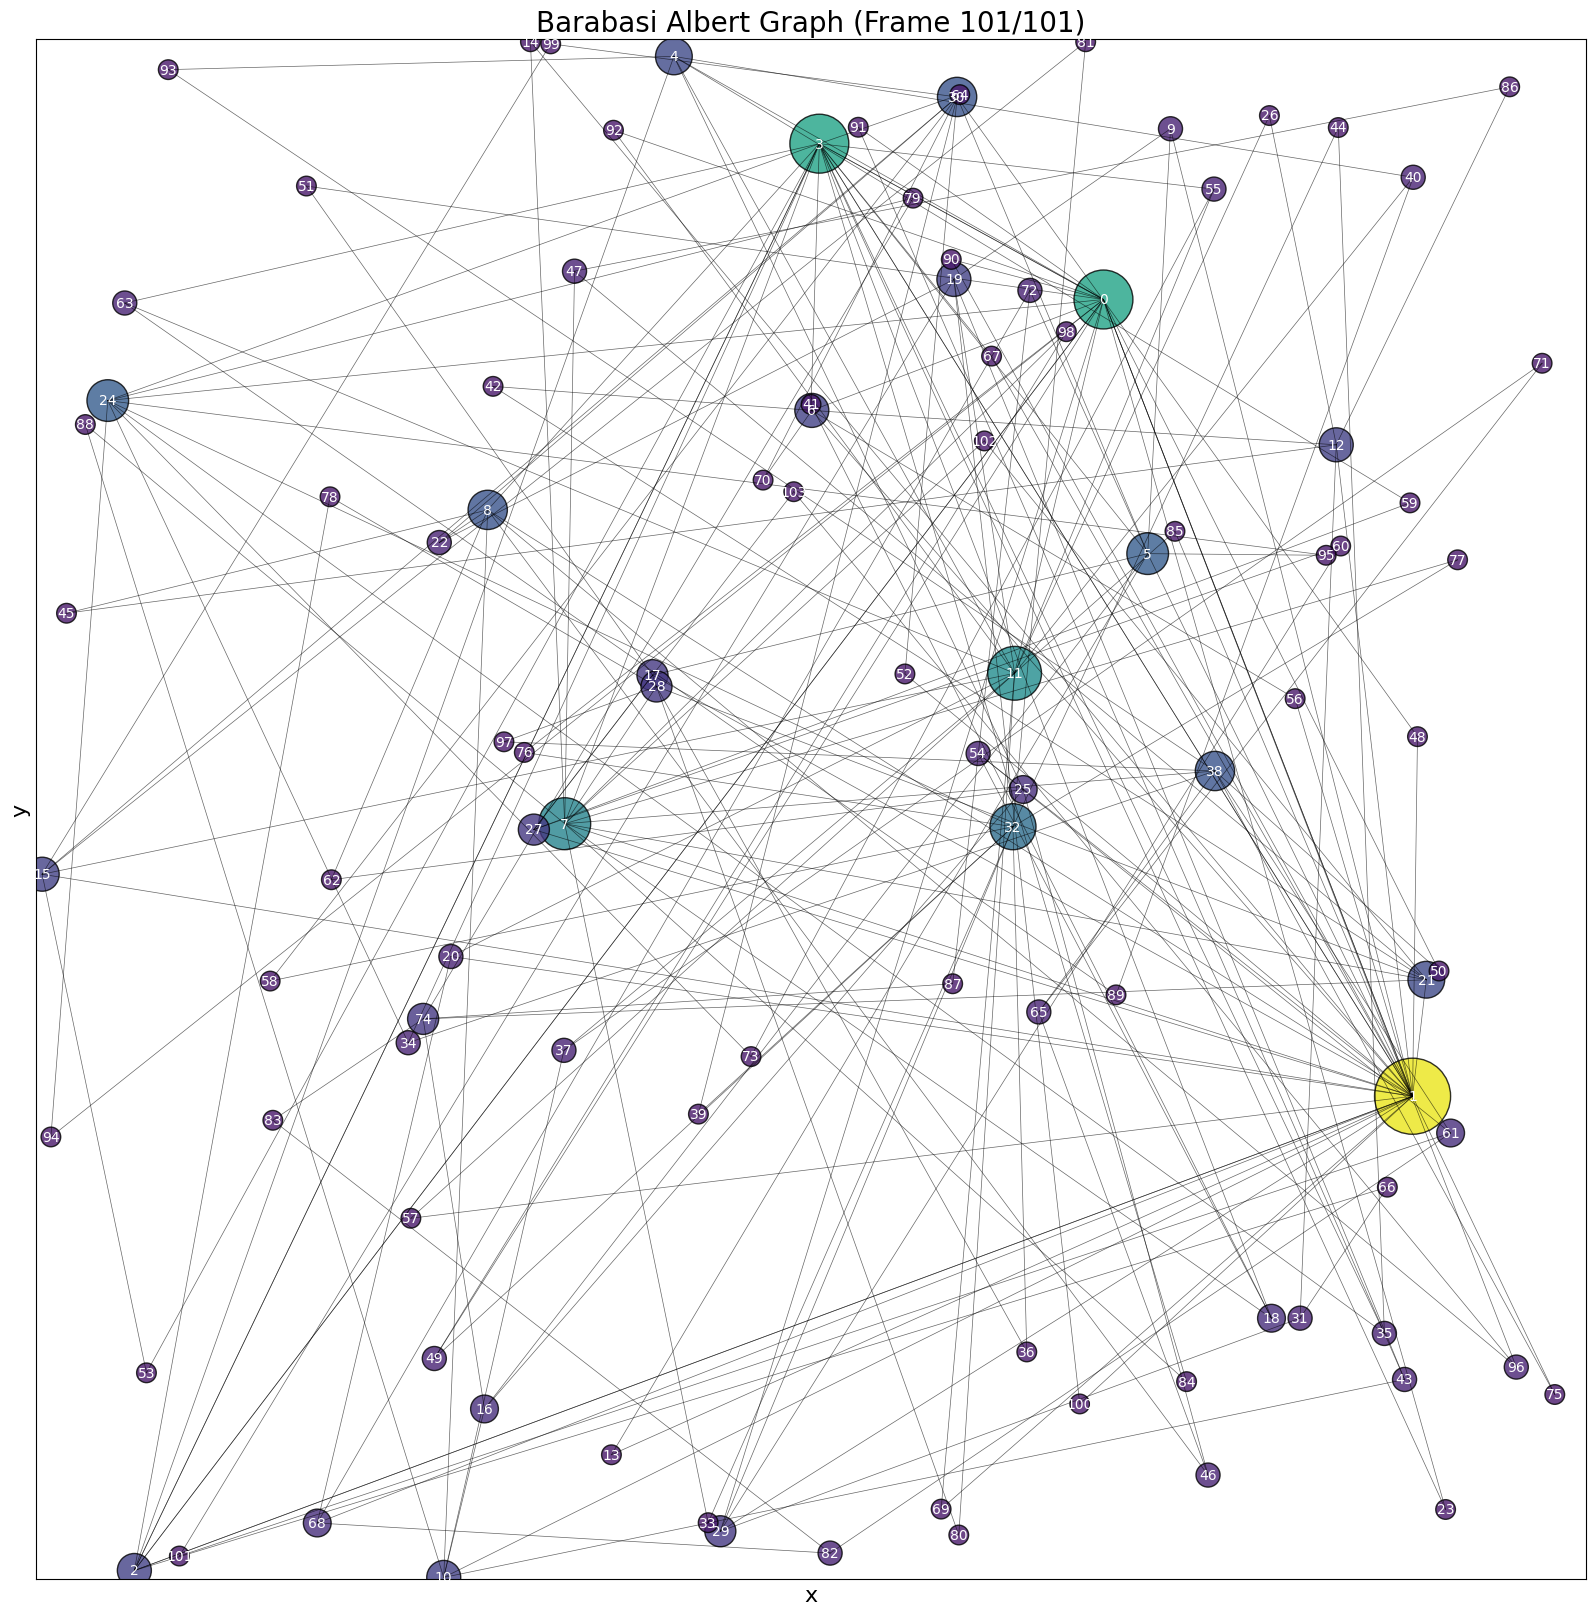

In [61]:
draw_animation(4, 2, 100)

# Ex 3

In [62]:
def plot_degree_distribution(degrees, m_0, n):
    fig = plt.figure(figsize=(20, 20))
    ax = plt.axes(xlim=(0, 10), ylim=(0, 1))
    ax.hist(degrees[n][:m_0+n], bins=10, density=True, alpha=0.5)
    ax.set_title("Degree Distribution")
    ax.set_xlabel("Degree")
    ax.set_ylabel("Probability")
    plt.show()

In [63]:
def get_mean_distributions(n_iter, size, m_0, m):
   
    timestamps = np.linspace(0, size, 10, dtype=int)
    mean_degrees = np.zeros(shape=(n_iter, len(timestamps), size+4))
    for i in range(n_iter):
        _, degrees = barabasi_albert_graph(m_0, m, size)
        for j, timestamp in enumerate(timestamps):
            mean_degrees[i, j, :] = degrees[timestamp]
    mean_degrees = np.mean(mean_degrees, axis=0)
    return mean_degrees


In [64]:
mean_degrees2 = get_mean_distributions(10, 1000, 4, 2)

In [65]:
n_iter = 10
size = 10000
timestamps = np.linspace(0, size, 10, dtype=int)
mean_degrees = np.zeros(shape=(n_iter, len(timestamps), size+4))
for i in range(n_iter):
    _, degrees = barabasi_albert_graph(4, 2, size)
    for j, timestamp in enumerate(timestamps):
        mean_degrees[i, j, :] = degrees[timestamp]
    



mean_degrees = np.mean(mean_degrees, axis=0)


In [66]:
size = 10000
_, degrees = barabasi_albert_graph(4, 2, size)

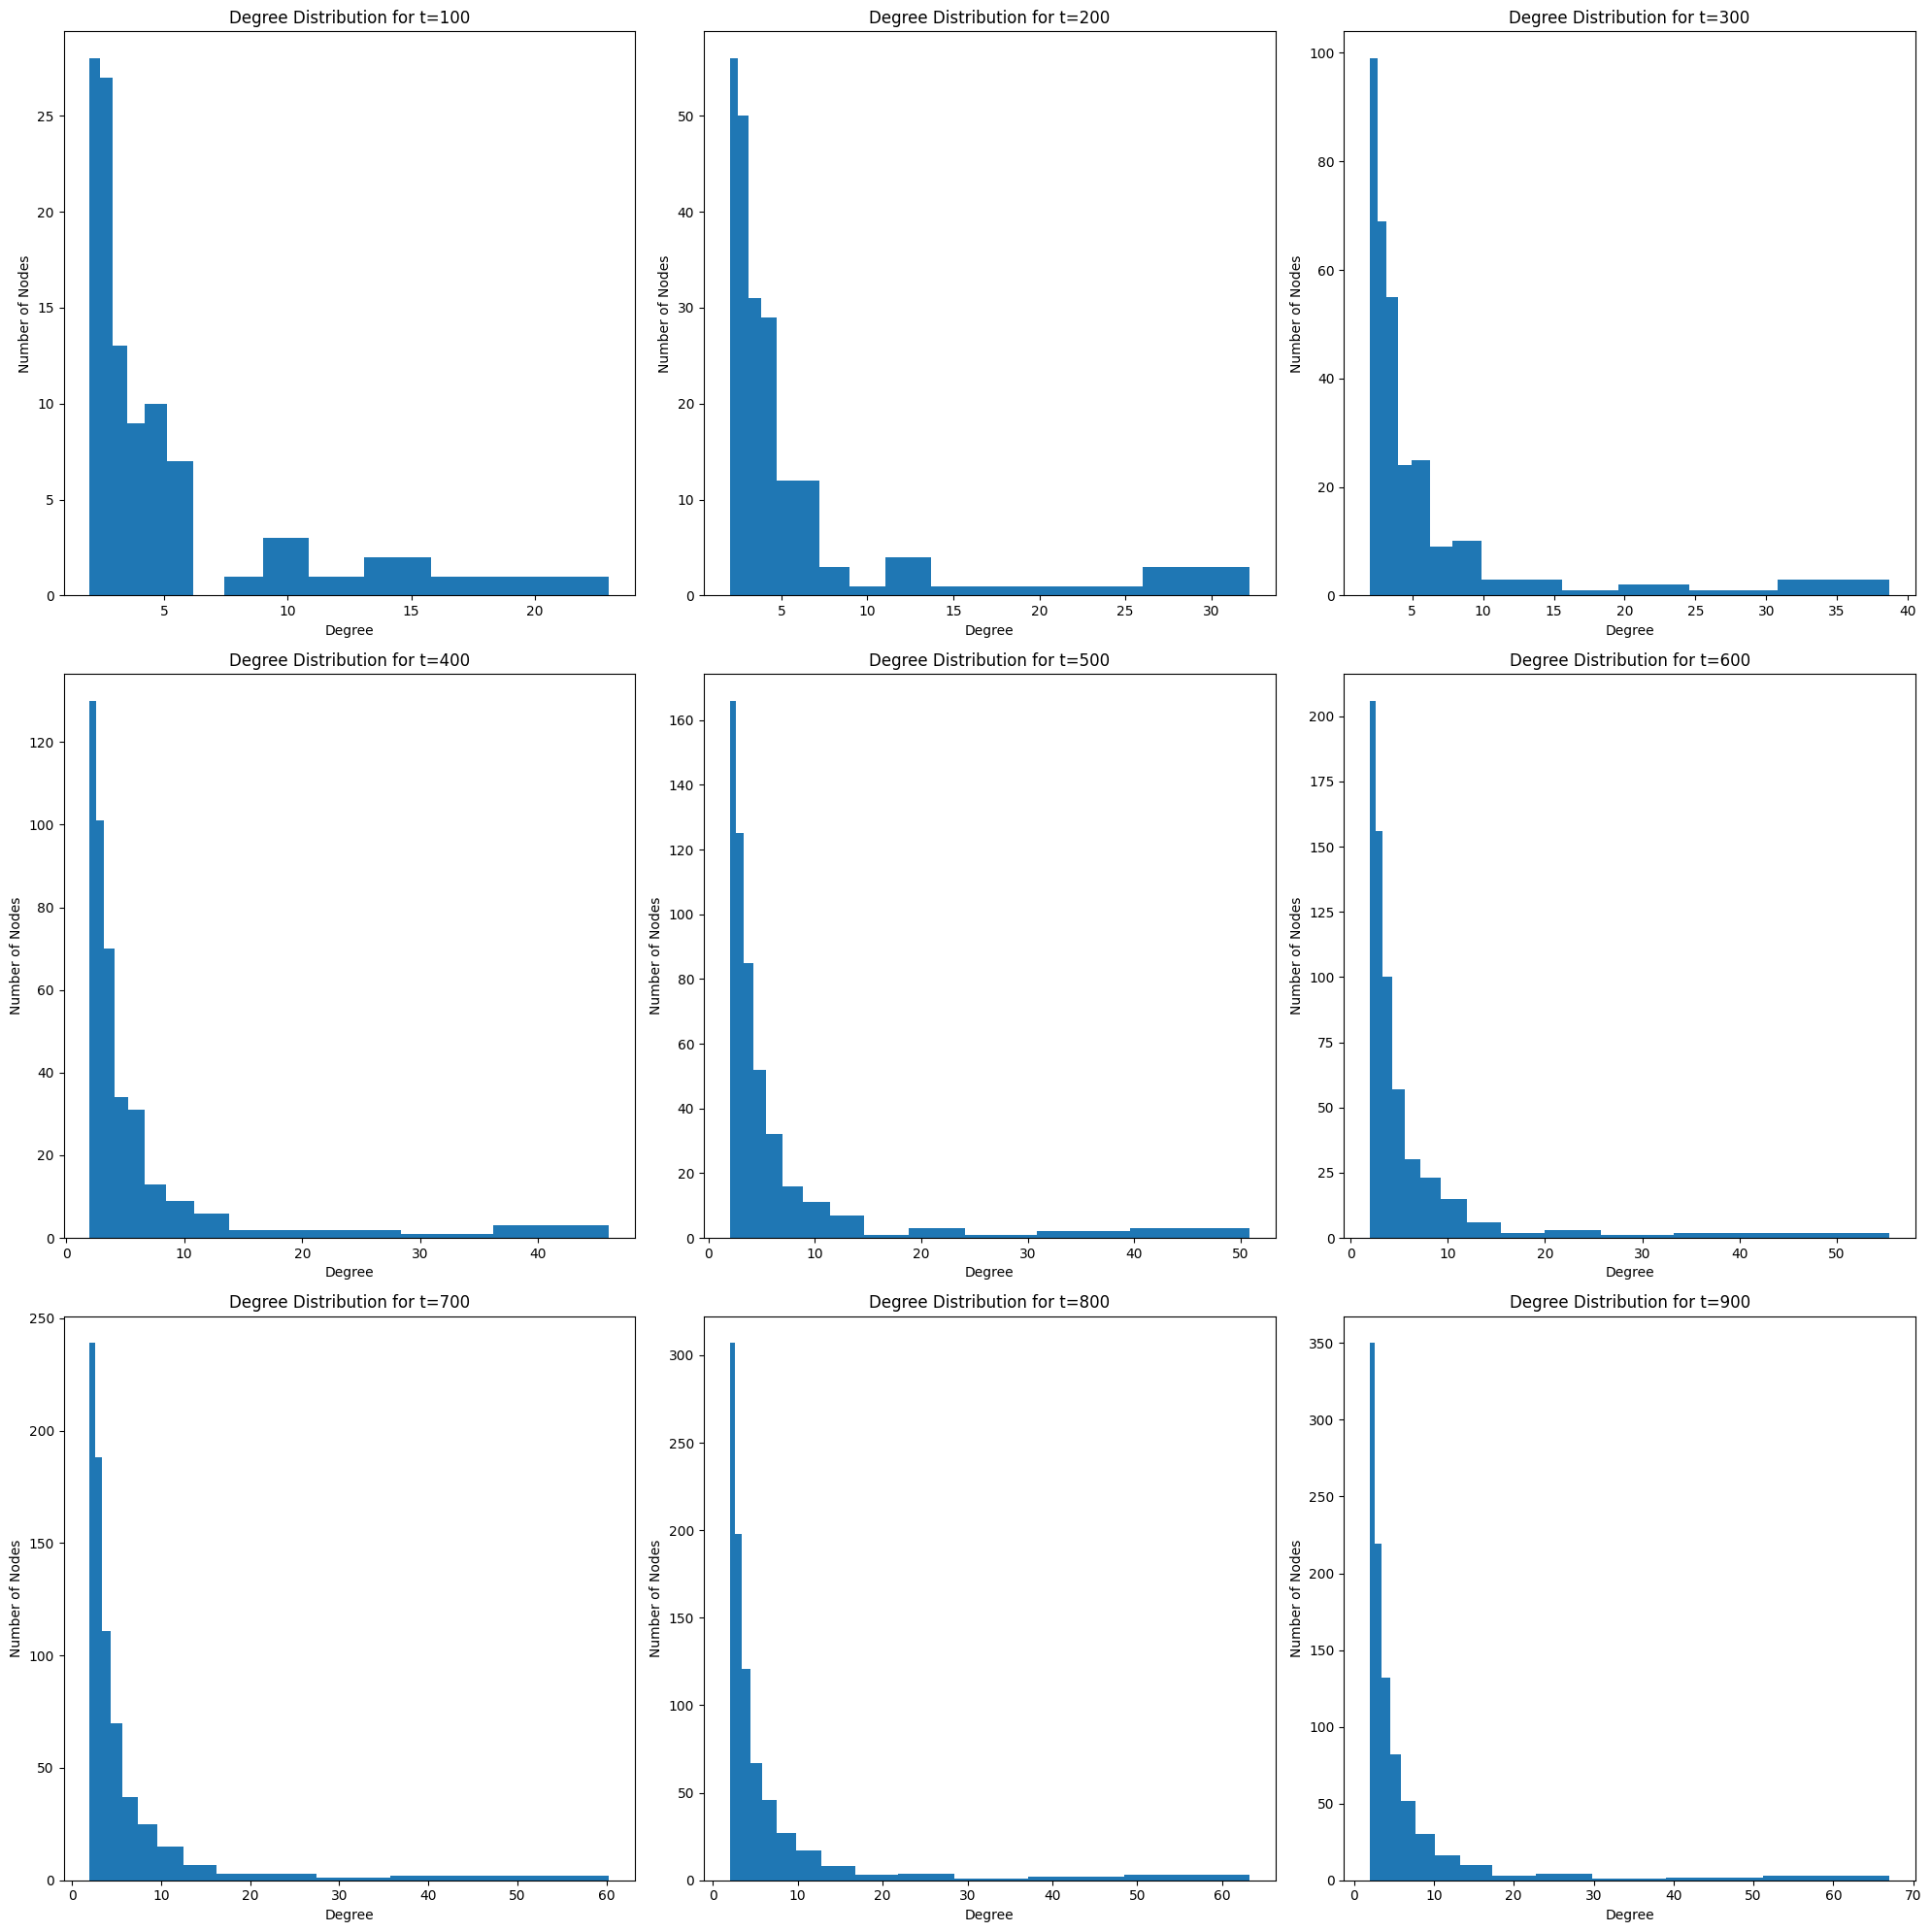

In [67]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20, 20))

for i in range(1, 10):
    ax = plt.subplot(3, 3, i)
    # Calculate logarithmically spaced bin edges
    bins = np.logspace(np.log10(min(mean_degrees2[i][:4+i*100])), np.log10(max(mean_degrees2[i][:4+i*100])), 14)

    
    ax.hist(mean_degrees2[i][:4+i*100], bins=bins)
    ax.set_title("Degree Distribution for t={}".format(i*100))
    ax.set_xlabel("Degree")
    ax.set_ylabel("Number of Nodes")


plt.tight_layout()
plt.show()




# Ex 4

In [68]:
import powerlaw

degrees = degrees[10000]
fit = powerlaw.Fit(degrees, discrete=True)
alpha = fit.alpha

Calculating best minimal value for power law fit


## From lecture: degree distribution should follow power-law: $P(k) = \frac{2m^2}{k^3}$. So $\alpha \sim 3$

In [69]:
alpha

2.6923008554017605

# Ex 5

# Theoretical expected degree of node $i$ at time $t$: $k_i(t) = m \sqrt{\frac{t}{t_i}}$

C:\Users\filip\AppData\Local\Temp\ipykernel_47352\2381950992.py:17: RuntimeWarning: divide by zero encountered in divide
  y = 3 * np.sqrt(np.array(ns[i]) / x)


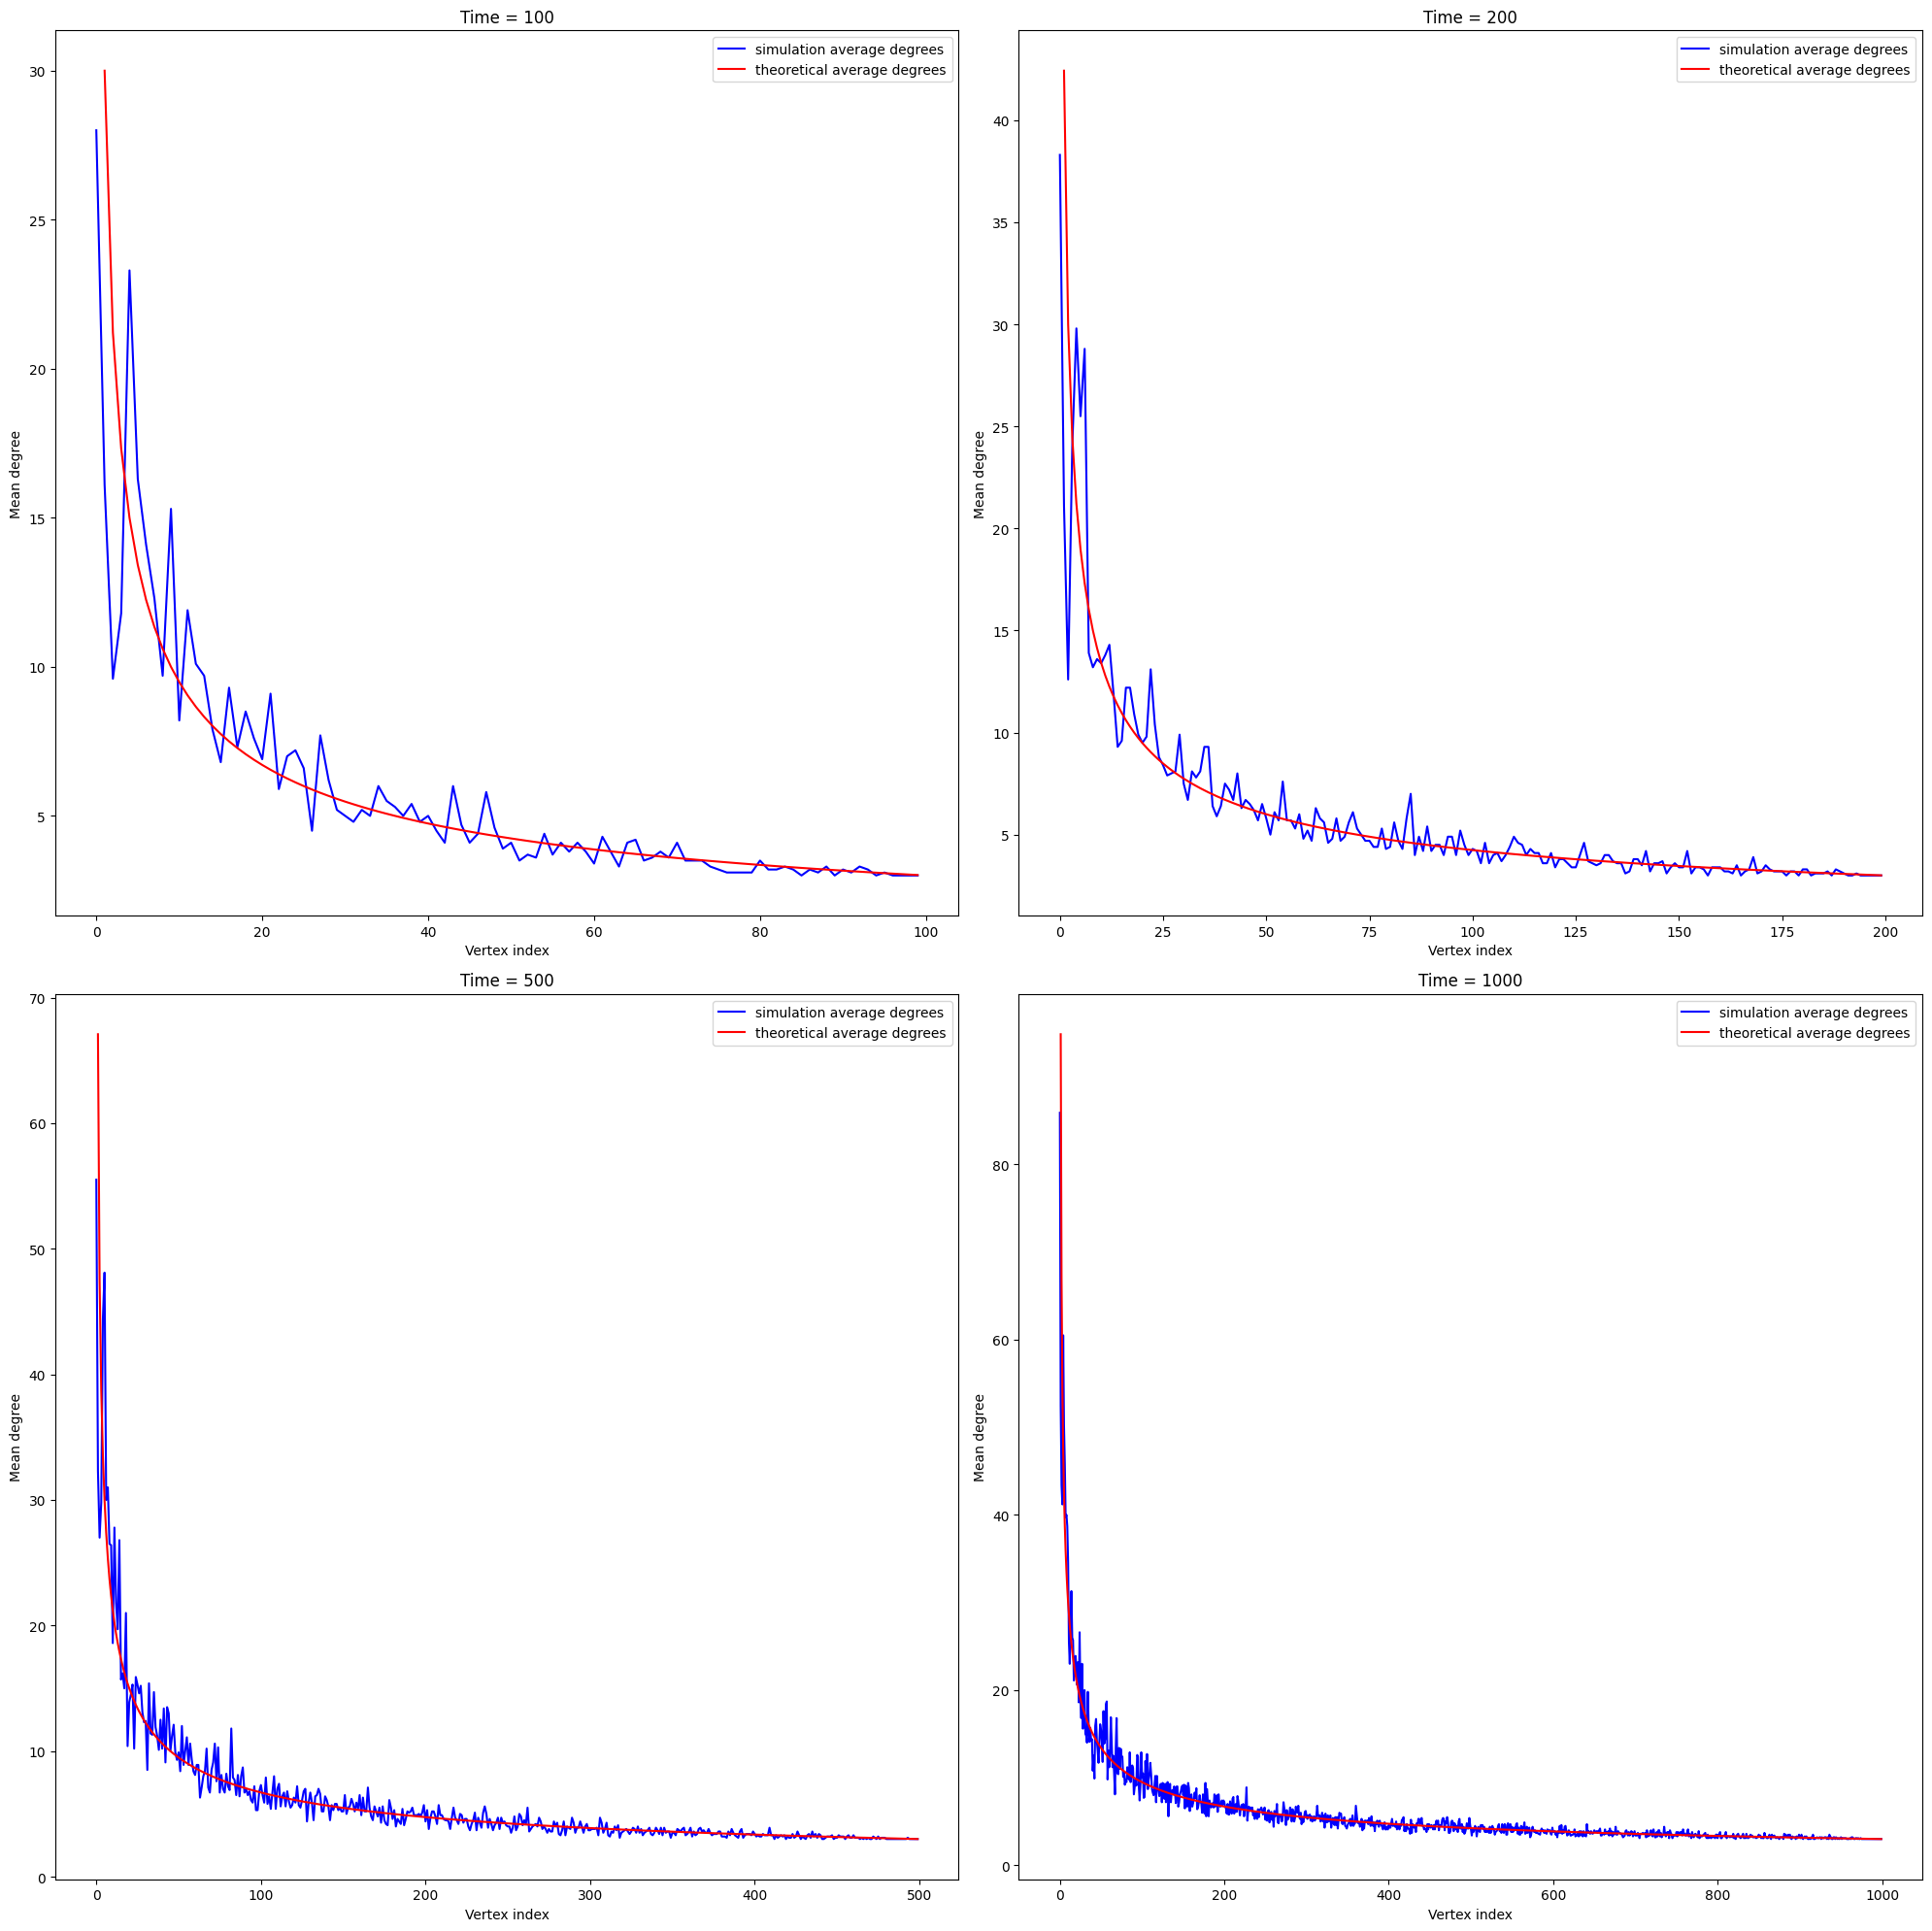

In [70]:
num_iters = 10
ns = [100, 200, 500, 1000]
degree_distributions = [np.zeros(n) for n in ns]
for j,n in enumerate(ns):
    for i in range(num_iters):
        G = nx.barabasi_albert_graph(n, 3)
        degrees = np.array(G.degree())[:, 1]
        degree_distributions[j] += degrees
    degree_distributions[j] /= num_iters

# plot degree distribution
fig = plt.figure(figsize=(20, 20))
for i in range(len(ns)):
    ax = plt.subplot(2, 2, i+1)
    ax.plot(range(ns[i]), degree_distributions[i], c='b', label='simulation average degrees')
    x = np.array(range(ns[i]))
    y = 3 * np.sqrt(np.array(ns[i]) / x)
    ax.plot(x, y, c='r', label='theoretical average degrees')
    ax.set_title("Time = {}".format(ns[i]))
    ax.set_xlabel("Vertex index")
    ax.set_ylabel("Mean degree")
    ax.legend()
plt.tight_layout()
plt.show()


# Task 6.3

In [71]:
# implement Barabasi Albert network model A
def barabasi_albert_graph_A(m_0, m, n):
 
    degree_dict = {}
    degrees = np.array([m_0-1 for _ in range(m_0)] + [0 for _ in range(n)])
    degree_dict[0] = degrees.copy()
   
    for i in range(n):
        probs = np.ones(m_0+i)/(m_0+i)
        nodes = np.random.choice(list(range(m_0 + i)), size=m, replace=False, p=probs)
        for node in nodes:
            degrees[node] += 1
            degrees[m_0 + i] += 1
        degree_dict[i+1] = degrees.copy()
    return degree_dict

# In model A, theoretical expected degree of node $i$ at time $t$: $k_i(t) = m \ln{\frac{t}{t_i}} + m$

C:\Users\filip\AppData\Local\Temp\ipykernel_47352\1017196377.py:17: RuntimeWarning: divide by zero encountered in divide
  y = 3 * np.log(np.array(ns[i]) / x) + 3


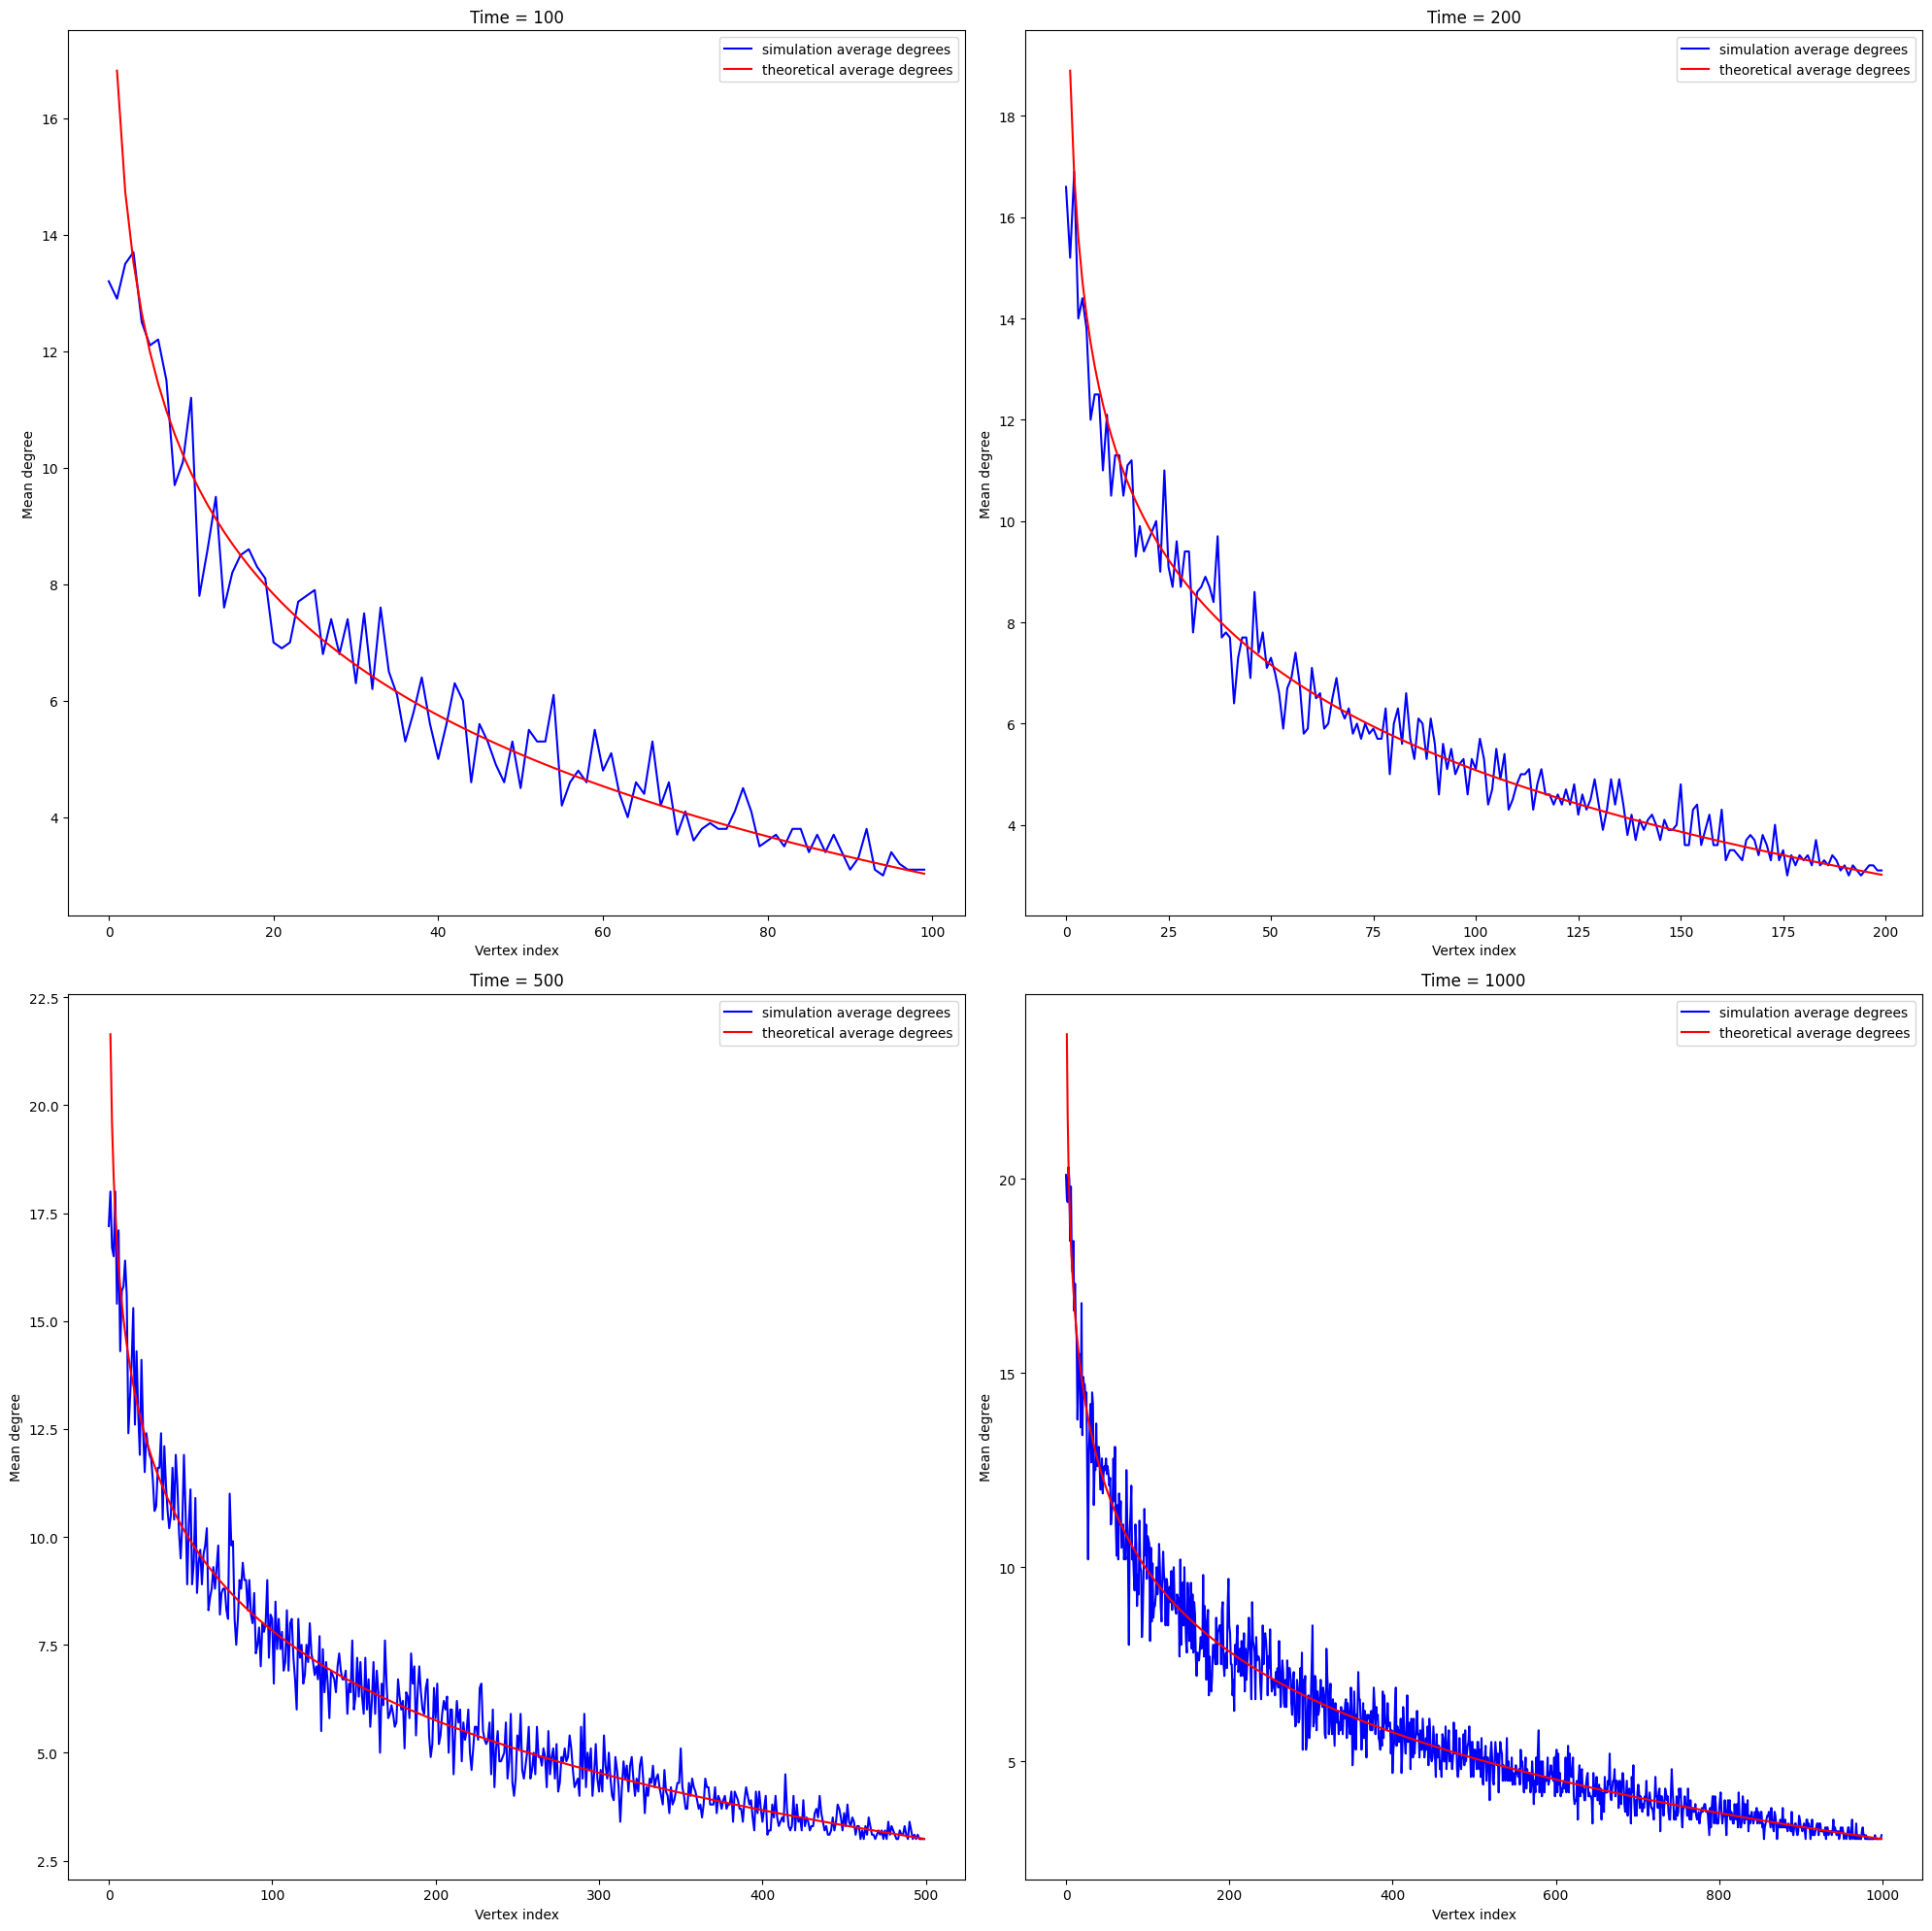

In [72]:
num_iters = 10
ns = [100, 200, 500, 1000]
degree_distributions = [np.zeros(n) for n in ns]
for j,n in enumerate(ns):
    for i in range(num_iters):
        degrees = barabasi_albert_graph_A(4, 3, n)
        degrees = degrees[n]
        degree_distributions[j] += degrees[:-4]
    degree_distributions[j] /= num_iters

# plot degree distribution
fig = plt.figure(figsize=(20, 20))
for i in range(len(ns)):
    ax = plt.subplot(2, 2, i+1)
    ax.plot(range(ns[i]), degree_distributions[i], c='b', label='simulation average degrees')
    x = np.array(range(ns[i]))
    y = 3 * np.log(np.array(ns[i]) / x) + 3
    ax.plot(x, y, c='r', label='theoretical average degrees')
    ax.set_title("Time = {}".format(ns[i]))
    ax.set_xlabel("Vertex index")
    ax.set_ylabel("Mean degree")
    ax.legend()
plt.tight_layout()
plt.show()


# Task 6.4

In [78]:
# implement Barabasi Albert network model B
def barabasi_albert_graph_B(n, t):
    edges = {}
    degree_dict = {}
    degrees = np.zeros(n)
    degree_dict[0] = degrees.copy()

   
    for i in range(t):
        # probs equal for all nodes
        if i > 0:
            probs = degrees/(i) + 1/n
        else:
            probs = np.ones(n)
       
        probs /= np.sum(probs)
        node1, node2 = np.random.choice(list(range(n)), size=2, replace=False, p=probs)
        degrees[node1] += 1
        degrees[node2] += 1
        degree_dict[i+1] = degrees.copy()
    return edges, degree_dict

In [79]:
num_iters = 1000
N = 100
ns = [100, 200, 500, 1000]
degree_distributions = [np.zeros(N) for n in ns]
for j,n in enumerate(ns):
    for i in range(num_iters):
        _, degrees = barabasi_albert_graph_B(N, n)
        degrees = degrees[n]
        degree_distributions[j] += degrees
    degree_distributions[j] /= num_iters


# In model B, theoretical expected degree of node $i$ at time $t$: $k_i(t) = 2t/N  $

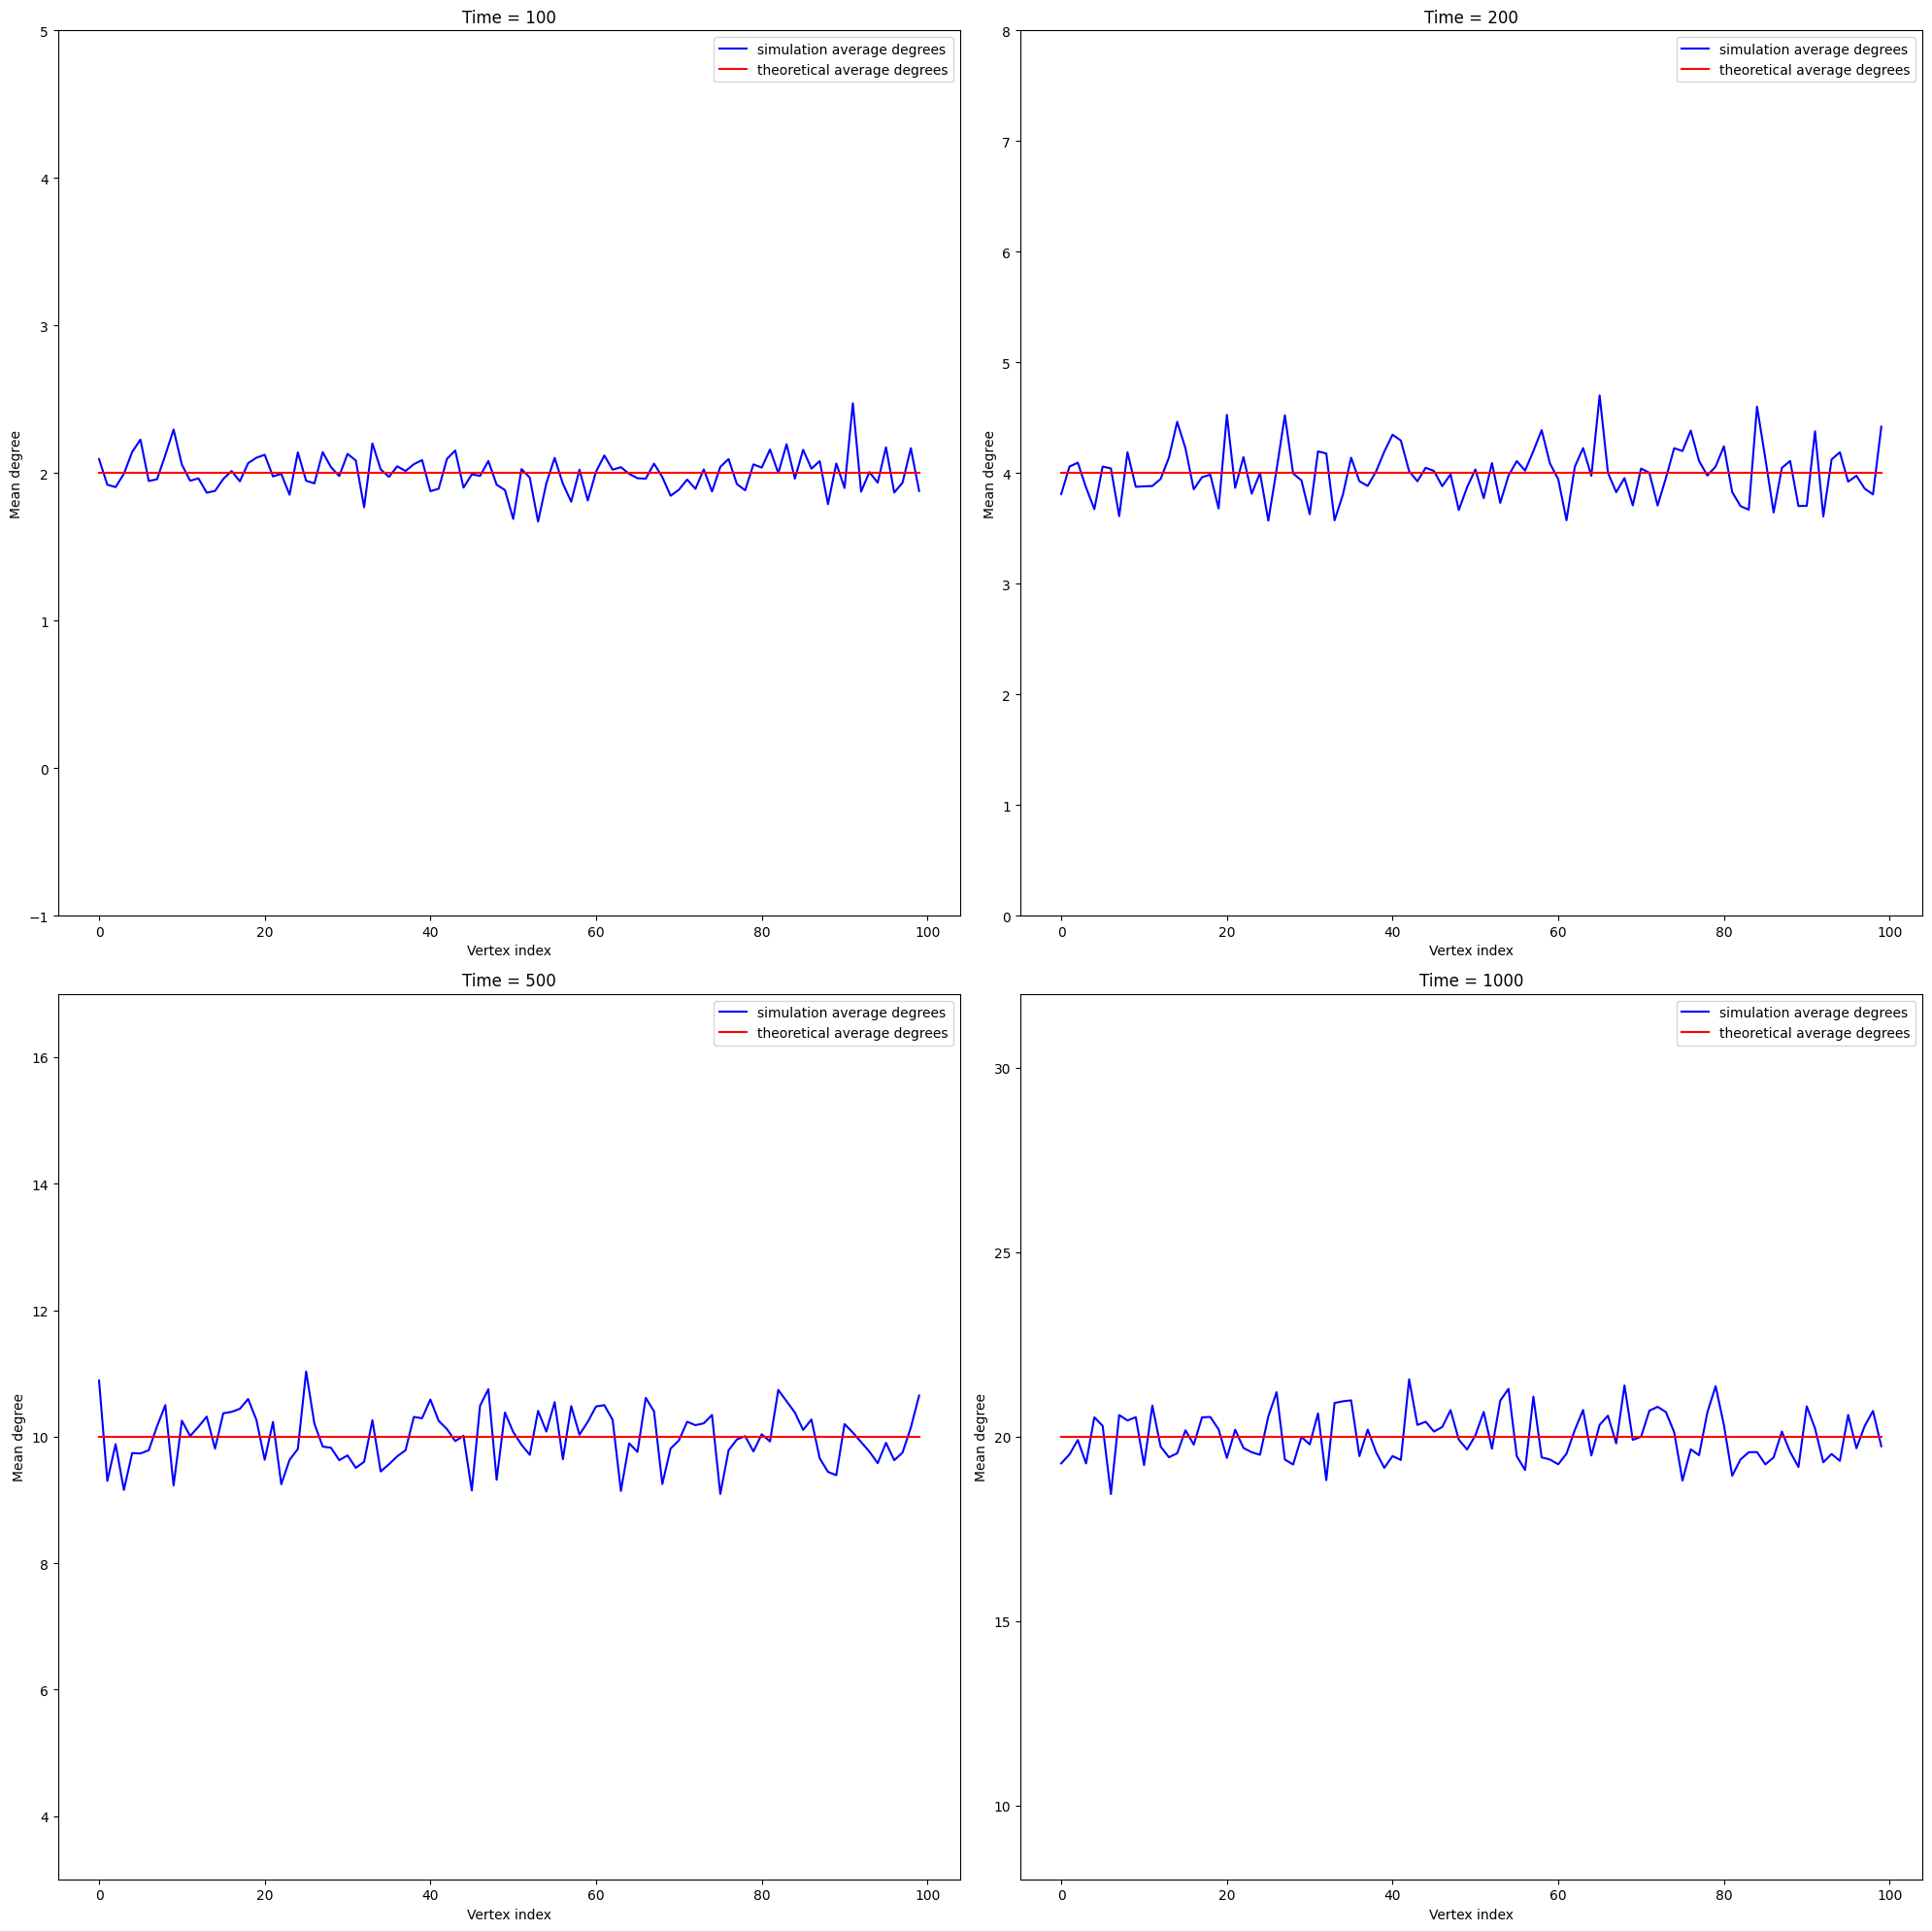

In [80]:
# plot degree distribution
fig = plt.figure(figsize=(20, 20))
for i in range(len(ns)):
    ax = plt.subplot(2, 2, i+1)
    ax.plot(range(N), degree_distributions[i], c='b', label='simulation average degrees')
    x = np.array(range(N))
    y = np.ones(N) * 2/N * ns[i]
    ax.plot(x, y, c='r', label='theoretical average degrees')
    ax.set_title("Time = {}".format(ns[i]))
    ax.set_xlabel("Vertex index")
    ax.set_ylabel("Mean degree")
    ax.set_ylim(2/N * ns[i] - ns[i]/100 - 2, 2/N * ns[i] + ns[i]/100 + 2)
    ax.legend()
plt.tight_layout()
plt.show()